# Programming Task 3  

**Assignment Points**: 100    
**Due Date**: Friday of Week 11 at 11:59pm   




---

## About This Assignment
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  

<hr style="width:35%;margin-left:0;"> 

## Task
You are employed by a large supermarket chain to perform customer segmentation analysis. In particular, you are provided with a dataset on 2000 customers that has been collected through loyalty cards that customers use at checkout, and includes variables such as customer age, gender, annual income, etc. 

Your task is to analyse the data in Python using relevant techniques covered in lectures, and identify customer segments given the dataset. You will then collect your results in tables and diagrams which you will include in a report of **up to 1000 words** (not counting tables and figures). Make sure your report is informative, intuitive, and easy to understand by the management, who may not have technical expertise. 

Your report should include the following headings:

1. **Introduction** (10 marks)
    - Motivate the problem and what you are trying to accomplish in this report
2. **Exploratory Data Analysis** (20 marks)
    - Perform basic exploratory data analysis, present and comment on summary statistics, etc.
3. **Customer Segmentation** (40 marks)
    - Apply clustering analysis we covered in lectures
    - Choose an optimal number of customer segments/clusters using methods discussed in lectures
    - Interpret identified clusters in terms customer profiles, e.g. there may be a cluster of university educated females living in a mid-sized city
    - Use two different clustering techniques
    - How do the clusters identified by the two techniques compare?
4. **Recommendations** (20 marks)

    - Provide some suggestions regarding marketing techniques that may be developed for different clusters of customers 
5. **Conclusion** (10 marks)
    - A brief summary of what you have done in the report

<hr style="width:35%;margin-left:0;"> 

## Submission   
You will need to submit two files:   

1. One PDF document containing your report to be submitted to the management. The report should be self-contained and include all relevant tables/graphs that you generated using the submitted Jupyter notebook. I recommend writing the report in Word, and then saving it as a PDF file which will be submitted.
2. Your Jupyter Notebook containing Python code used in your analysis. Make sure your code is clean and easy to understand by the markers.  

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:

datalegend = pd.read_csv('data/data legend.csv')
train = pd.read_csv('data/data.csv')
datalegend

,Variable,Data type,Range,Description,Unnamed: 4
0,ID,numerical,Integer,Shows a unique identificator of a customer.,NaN
1,NaN,NaN,NaN,NaN,NaN
2,Sex,categorical,"{0,1}",Biological sex (gender) of a customer. In this...,NaN
3,NaN,NaN,0,male,NaN
4,NaN,NaN,1,female,NaN
5,NaN,NaN,NaN,NaN,NaN
6,Marital status,categorical,"{0,1}",Marital status of a customer.,NaN
7,NaN,NaN,0,single,NaN
8,NaN,NaN,1,non-single (divorced / separated / married / w...,NaN
9,NaN,NaN,NaN,NaN,NaN


In [3]:
missing_values_col = train.isna().sum()
print(missing_values_col)
print('\n Customer income stats: \n', train['Income'].describe())
print('\n Customer occupation stats: \n', train['Occupation'].mode())
print('\n Customer settlement size stats: \n', train['Settlement size'].mode())

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

 Customer income stats: 
 count      2000.000000
mean     120954.419000
std       38108.824679
min       35832.000000
25%       97663.250000
50%      115548.500000
75%      138072.250000
max      309364.000000
Name: Income, dtype: float64

 Customer occupation stats: 
 0    1
dtype: int64

 Customer settlement size stats: 
 0    0
dtype: int64


[Text(0, 0, 'Unskilled'), Text(1, 0, 'Skilled'), Text(2, 0, 'Professional')]

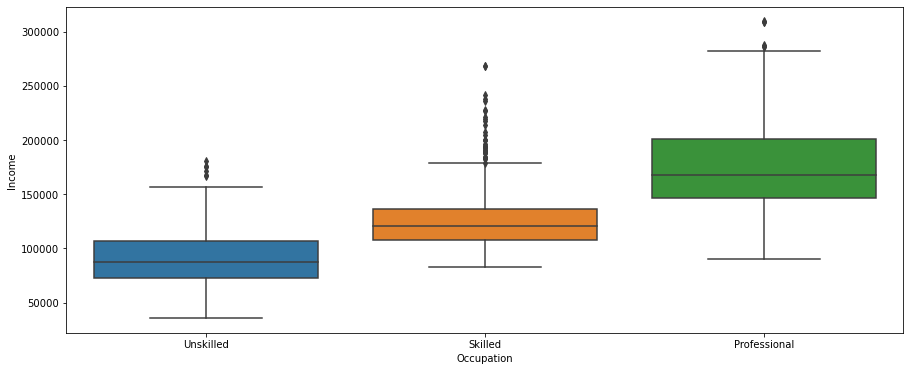

In [4]:
plt.figure(figsize=(15,6))
ax = sns.boxplot(x=train['Occupation'], y=train['Income'])
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Unskilled'
labels[1] = 'Skilled'
labels[2] = 'Professional'
ax.set_xticklabels(labels)

[Text(0, 0, 'small city'), Text(1, 0, 'mid city'), Text(2, 0, 'big city')]

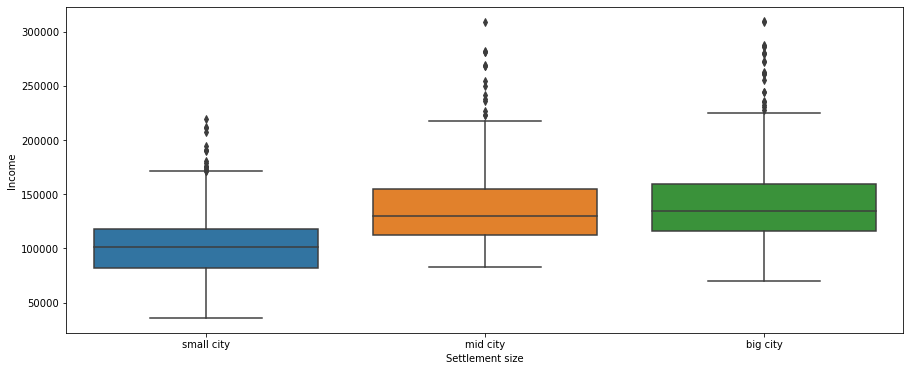

In [5]:
plt.figure(figsize=(15,6))
ax = sns.boxplot(x=train['Settlement size'], y=train['Income'])
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'small city'
labels[1] = 'mid city'
labels[2] = 'big city'
ax.set_xticklabels(labels)

3. **Customer Segmentation** (40 marks)
    - Apply clustering analysis we covered in lectures
    - Choose an optimal number of customer segments/clusters using methods discussed in lectures
    - Interpret identified clusters in terms customer profiles, e.g. there may be a cluster of university educated females living in a mid-sized city
    - Use two different clustering techniques
    - How do the clusters identified by the two techniques compare?
4. **Recommendations** (20 marks)
    - Provide some suggestions regarding marketing techniques that may be developed for different clusters of customers 
5. **Conclusion** (10 marks)
    - A brief summary of what you have done in the report


## standardise income and age

In [6]:
train['Income'] = (train['Income']-train['Income'].mean())/(train['Income'].std())
train['Age'] = (train['Age']-train['Age'].mean())/(train['Age'].std())

train.drop(columns=['ID'], inplace=True)

## Elbowing for k

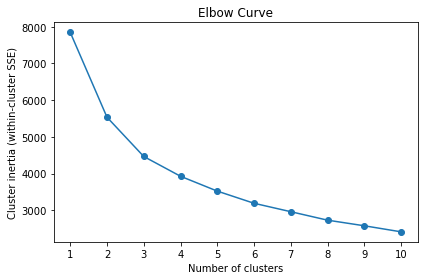

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


inertias = [] # empty list

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(train)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.title('Elbow Curve')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

## Techique 1

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

km = KMeans(n_clusters=4, 
            init='random',  # use standard k-means rather than k-means++ (see below)
            n_init=10,      # run 10 times with different random centroids to choose the final model with the lowest SSE
            max_iter=300,   # max number of iterations for each run
            random_state=0)
y_km = km.fit_predict(train)
train['KMeans Cluster'] = y_km
print(y_km)
print(f'\nClusters:\n {km.cluster_centers_}')

[3 1 3 ... 0 0 0]

Clusters:
 [[ 0.63043478  0.56521739 -0.51555465  0.83759591 -0.67539309  0.4028133
   0.02429668]
 [ 0.33781764  0.48281016 -0.42563798  0.81165919  0.16629564  1.13004484
   1.43198804]
 [ 0.25560538  0.40807175  1.02902943  1.48430493  1.89567765  1.6367713
   1.51569507]
 [ 0.42331288  0.4202454   1.40626374  1.67791411 -0.01788498  0.56748466
   0.5       ]]


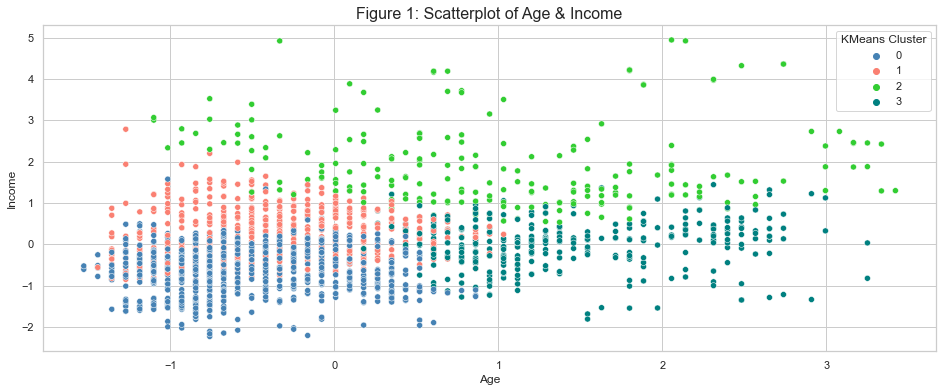

In [69]:
colours = ['steelblue','salmon','limegreen','teal']

#palette= 'tab10'
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,9))
plt.figure(figsize=(16,6))
sns.scatterplot(data=train, x=train['Age'], y = train['Income'], legend = True, hue = 'KMeans Cluster', palette=colours)
#sns.scatterplot(data=train, x=train['Occupation'], y = train['Income'], legend = True, hue = 'KMeans Cluster', palette= colours, ax=axes[0, 1])
#sns.scatterplot(data=train, x=train['Age'], y = train['Occupation'], legend = True, hue = 'KMeans Cluster', palette= colours,ax=axes[1, 0])
#sns.scatterplot(data=train, x=train['Education'], y = train['Income'], legend = True, hue = 'KMeans Cluster', palette= colours,ax=axes[1, 1])


# Set titles for each subplot if desired
#axes[0, 0].set_title('Scatter 1: Age & Income')
#axes[0, 1].set_title('Scatter 2: Occupation & Income')
#axes[1, 0].set_title('Scatter 3: Age & Occupation')
#axes[1, 1].set_title('Scatter 4: Education & Age')
#plt.tight_layout()

plt.title('Figure 1: Scatterplot of Age & Income', fontsize=(16))
plt.show()

In [10]:
Cluster_1 = train.loc[train['KMeans Cluster']==0]
Cluster_2 = train.loc[train['KMeans Cluster']==1]
Cluster_3 = train.loc[train['KMeans Cluster']==2]
Cluster_4 = train.loc[train['KMeans Cluster']==3]

<Figure size 1440x432 with 0 Axes>

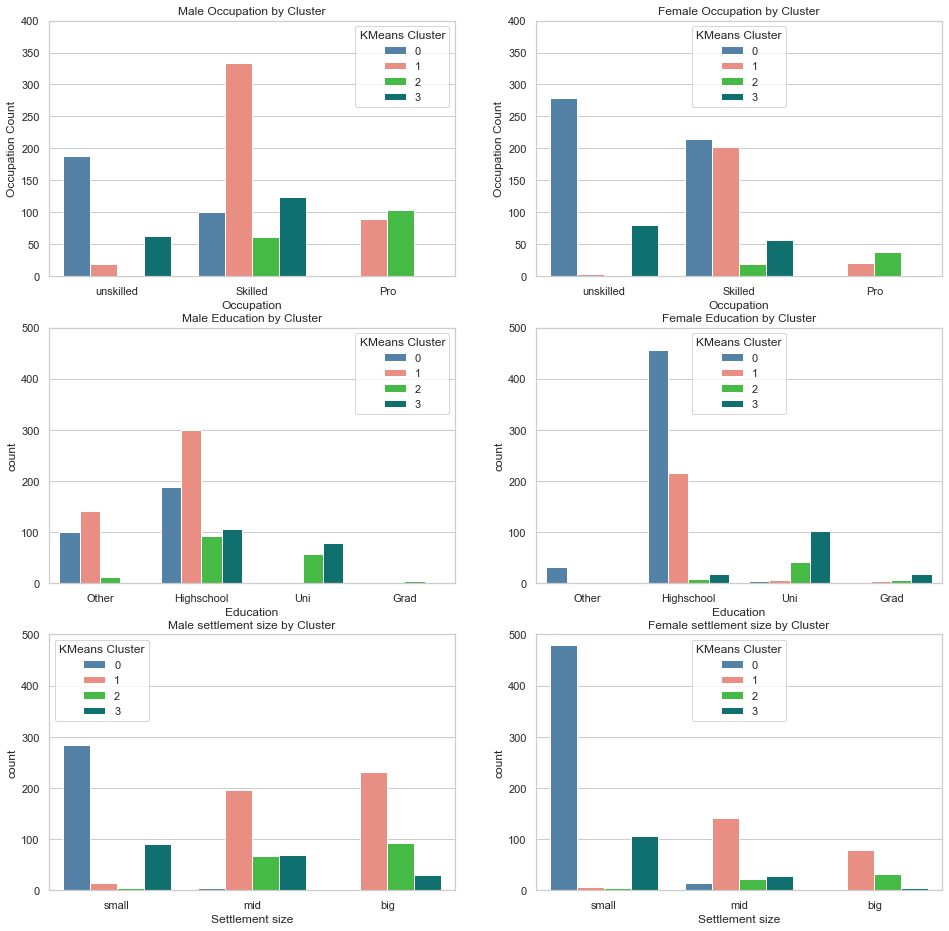

<Figure size 432x288 with 0 Axes>

In [61]:
plt.figure(figsize = (20,6))
male = train.loc[train['Sex']==0]
female = train.loc[train['Sex']==1]
group_occM = male.groupby(['Occupation', 'KMeans Cluster']).size().reset_index(name='Occupation Count')
group_occF = female.groupby(['Occupation', 'KMeans Cluster']).size().reset_index(name='Occupation Count')

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,16))
sns.set(style='whitegrid')

ax = sns.barplot(x='Occupation',y='Occupation Count',hue = 'KMeans Cluster',palette = colours, data=group_occM, ax=axes[0,0])
ax2 = sns.barplot(x='Occupation',y='Occupation Count',hue = 'KMeans Cluster',palette = colours, data=group_occF, ax=axes[0,1])
ax3 = sns.countplot(data=male, x='Education', hue='KMeans Cluster', palette = colours, ax=axes[1,0])
ax4 = sns.countplot(data=female, x='Education', hue='KMeans Cluster', palette = colours, ax=axes[1,1])
ax5 = sns.countplot(data=male, x='Settlement size', hue='KMeans Cluster', palette = colours, ax=axes[2,0])
ax6 = sns.countplot(data=female, x='Settlement size', hue='KMeans Cluster', palette = colours, ax=axes[2,1])

new_x_labels_occ = ['unskilled', 'Skilled','Pro']
new_x_labels_ed = ['Other', 'Highschool','Uni','Grad']
new_x_labels_ss = ['small', 'mid','big']

ax.set_xticklabels(new_x_labels_occ)
ax2.set_xticklabels(new_x_labels_occ)
ax3.set_xticklabels(new_x_labels_ed)
ax4.set_xticklabels(new_x_labels_ed)
ax5.set_xticklabels(new_x_labels_ss)
ax6.set_xticklabels(new_x_labels_ss)

# Titles for graphs
axes[0,0].set_title('Male Occupation by Cluster')
axes[0,1].set_title('Female Occupation by Cluster')
axes[1,0].set_title('Male Education by Cluster')
axes[1,1].set_title('Female Education by Cluster')
axes[2,0].set_title('Male settlement size by Cluster')
axes[2,1].set_title('Female settlement size by Cluster')

# set Axes limit
axes[0,0].set_ylim(0,400)
axes[0,1].set_ylim(0,400)
axes[1,0].set_ylim(0,500)
axes[1,1].set_ylim(0,500)
axes[2,0].set_ylim(0,500)
axes[2,1].set_ylim(0,500)

plt.show()
plt.savefig('image.png', dpi=300)

Text(0.5, 1.0, 'Female Marital Status')

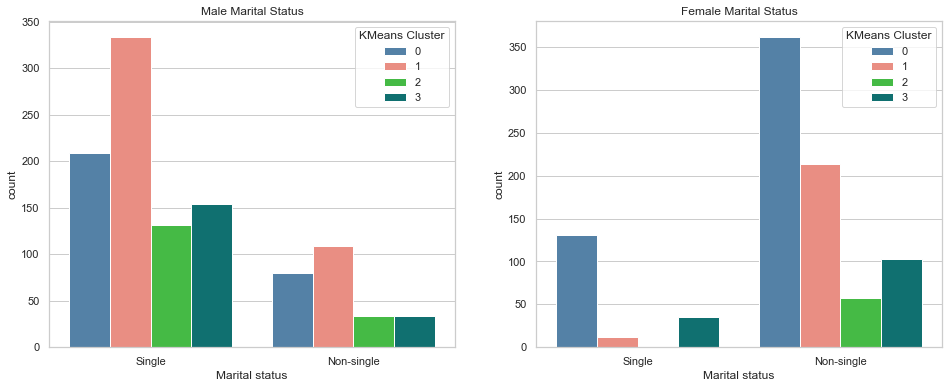

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax = sns.countplot(data=male, x='Marital status', hue='KMeans Cluster', palette = colours,ax=axes[0])
ax2 = sns.countplot(data=female, x='Marital status', hue='KMeans Cluster', palette = colours,ax=axes[1])

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
new_x_labels = ['Single', 'Non-single']
ax.set_xticklabels(new_x_labels)
ax2.set_xticklabels(new_x_labels)
axes[0].set_title('Male Marital Status')
axes[1].set_title('Female Marital Status')


[Text(0, 0, 'small'), Text(1, 0, 'mid'), Text(2, 0, 'big')]

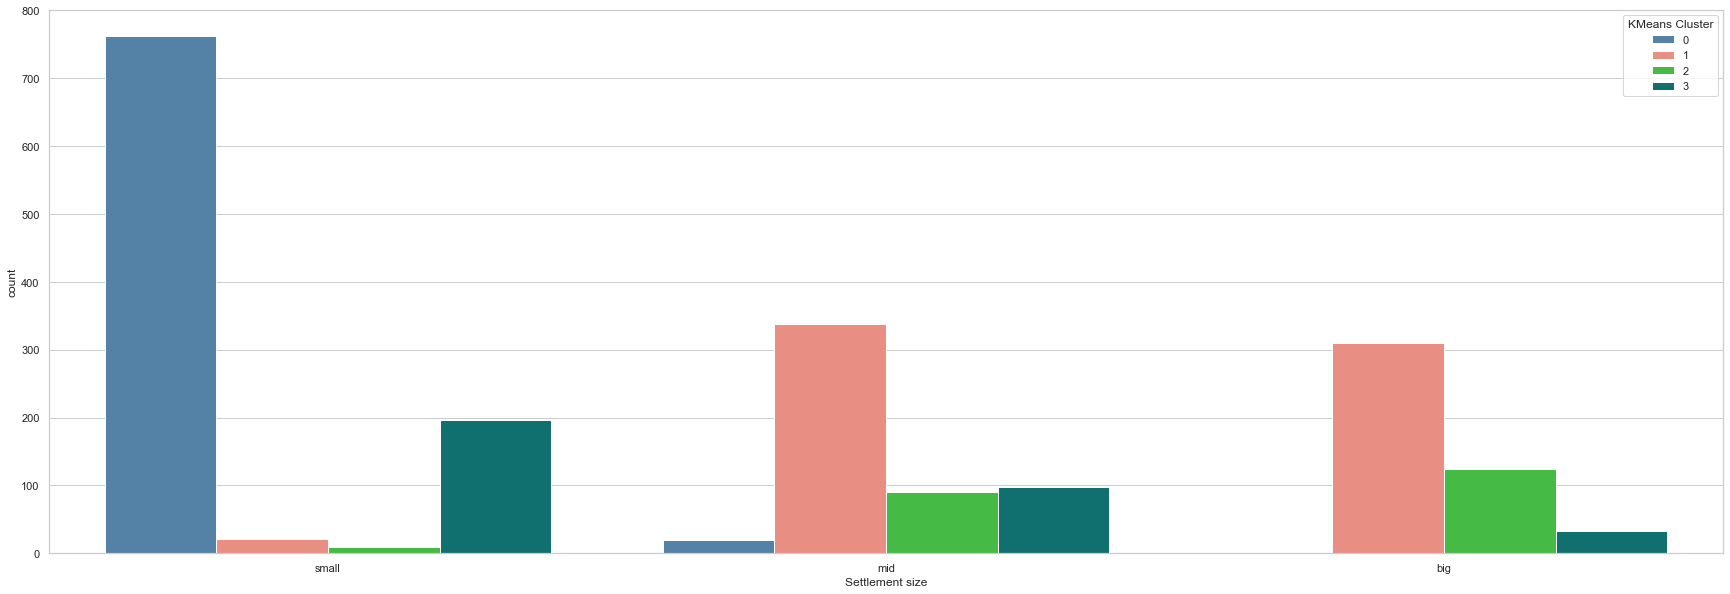

In [13]:
plt.figure(figsize = (30,10))
ax = sns.countplot(data=train, x='age', hue='KMeans Cluster', palette = colours)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
new_x_labels = ['small', 'mid', 'big']
ax.set_xticklabels(new_x_labels)

[Text(0, 0, 'Other'),
 Text(1, 0, 'Highschool'),
 Text(2, 0, 'Uni'),
 Text(3, 0, 'Grad')]

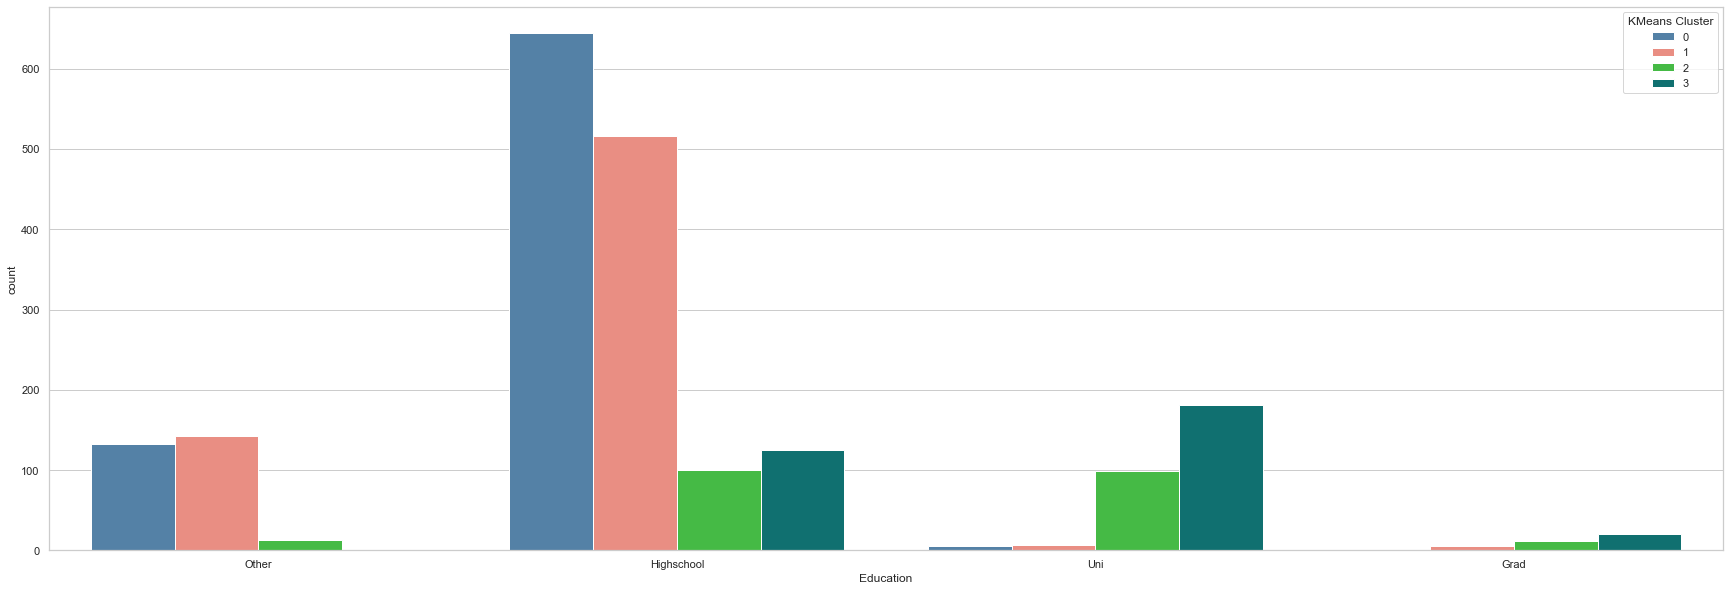

In [14]:
plt.figure(figsize = (30,10))
ax = sns.countplot(data=train, x='Education', hue='KMeans Cluster', palette = colours)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
new_x_labels = ['Other', 'Highschool','Uni', 'Grad']
ax.set_xticklabels(new_x_labels)

### Technique 2 Agglomerative clustering

In [16]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(train)
train['Agglomerative Cluster'] = labels
#np.set_printoptions(threshold=np.inf)
print('Cluster labels: %s' % labels)

Cluster labels: [0 2 0 ... 3 3 3]


<AxesSubplot:xlabel='Age', ylabel='Income'>

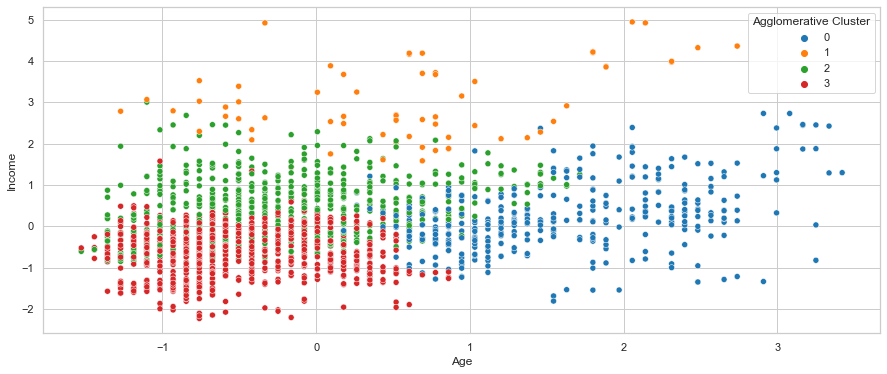

In [17]:
plt.figure(figsize= (15,6))
sns.scatterplot(data=train, x=train['Age'], y = train['Income'], legend = True, hue = 'Agglomerative Cluster', palette='tab10')

C:\Users\samue\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samue\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samue\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Income', ylabel='Density'>

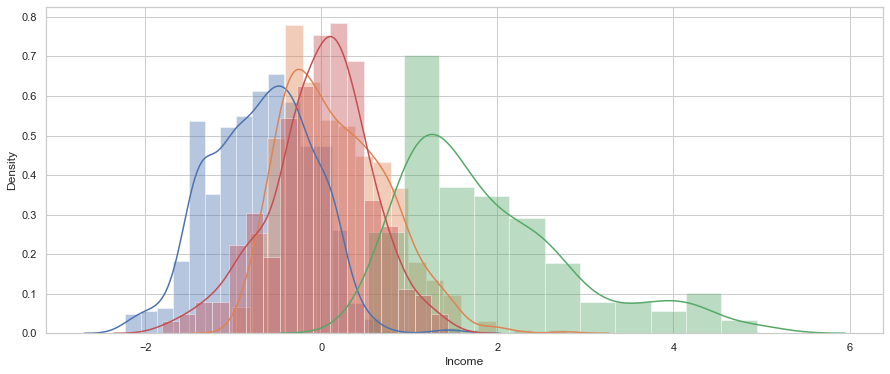

In [18]:
plt.figure(figsize= (15,6))
sns.distplot(Cluster_1['Income'])
sns.distplot(Cluster_2['Income'])
sns.distplot(Cluster_3['Income'])
sns.distplot(Cluster_4['Income'])

ValueError: Could not interpret input 'Agglomerative Cluster'

<Figure size 1440x432 with 0 Axes>

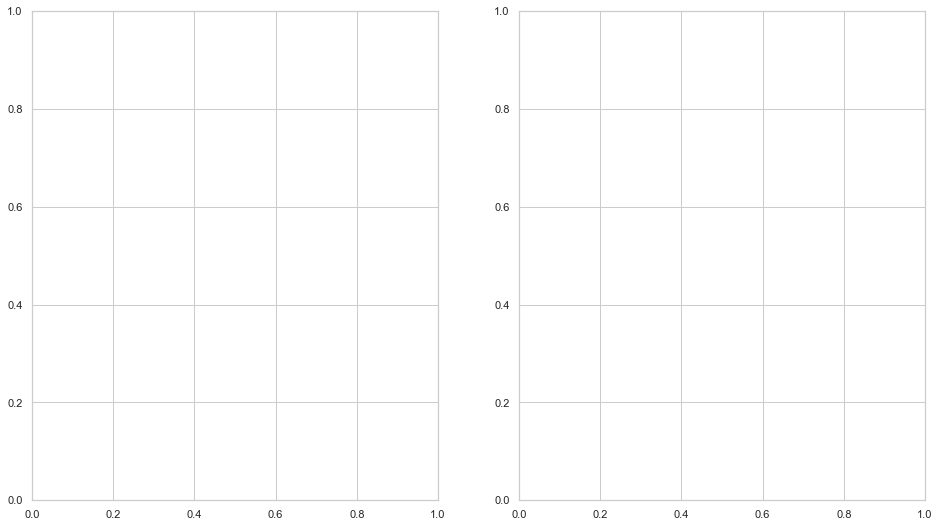

In [19]:
plt.figure(figsize = (20,6))
male = train.loc[train['Sex']==0]
female = train.loc[train['Sex']==1]
groupM = male.groupby(['Occupation', 'Agglomerative Cluster']).size().reset_index(name='Occupation Count')
groupF = female.groupby(['Occupation', 'Agglomerative Cluster']).size().reset_index(name='Occupation Count')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,9))
sns.set(style='whitegrid')
ax = sns.barplot(x='Occupation',y='Occupation Count',hue = 'Agglomerative Cluster',palette = colours, data=group_occM, ax=axes[0])
ax2 = sns.barplot(x='Occupation',y='Occupation Count',hue = 'Agglomerative Cluster',palette = colours, data=group_occF, ax=axes[1])
ax3 = sns.countplot(data=train, x='Settlement size', hue='Agglomerative Cluster', palette = colours)
ax4 = sns.countplot(data=train, x='Settlement size', hue='Agglomerative Cluster', palette = colours)

new_x_labels = ['unskilled', 'Skilled','Pro']
ax.set_xticklabels(new_x_labels)
ax2.set_xticklabels(new_x_labels)
axes[0].set_title('Male Occupation by Cluster')
axes[1].set_title('Female Occupation by Cluster')
plt.ylim(0,350)
plt.show()